<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Hi, Cristopher! Unfortunately it seems that you overlooked some of the problems I mentioned in the first review. Can you please take another look?

</div>

<div class="alert alert-info">
One question at the bottom. Why is my sMAPE score the same for both values? 
    
Also, I see what you mean about the y_pred[0], it caused a lot of issues but I figured them out. Why does it not grab the first column in y_pred? Why is it y_pred with 0 being the column name? 
    
I think I am done but might need to fix the issue with the scores being the same if there is a way to make the linear score better, please let me know.
    
Thanks again for the review!
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

> Why is my sMAPE score the same for both values?
    
It's not quite the same, although the values are indeed close. 
    
> Why does it not grab the first column in y_pred? Why is it y_pred with 0 being the column name?
    
Because unless you convert `y_pred` to a dataframe with column names 0 and 1, it is a numpy array, and for numpy arrays grabbing the first column is done like this: `y_pred[:, 0]` (for dataframes, in general you can do `y_pred.loc[:, 0]`, not depending on having 0 as the first column name), while `y_pred[0]` would give the first row.
    
> I think I am done but might need to fix the issue with the scores being the same if there is a way to make the linear score better, please let me know.
    
Yeah, there's no score requirements in the project, so it's fine. It seems that this is the expected result: sometimes our models for one reason or another can't give us much of an advantage over a simple rule of thumb (like always predicting the median). Maybe there are some hidden variables we don't have access to, maybe the data quality is not so good. 

You're welcome! The project is accepted. Good luck on the next sprint!
    
</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a pretty good job overall, but there are some problems that need to be fixed before the project can be accepted. Let me know if you have any questions!

# INTRODUCTION

#### In this report I will be looking at gold output from the beginning process until the final output. We will be viewing how much gold the floatation process has from the beginning in the rougher output through all of the stages and the difference in the final output. Then we will create a model to predict the output of gold in future projects.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Using headers for your main text is not very good for readability. Consider using regular text for your conclusions and leaving headers for actual headers :)

</div>

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#importing Classifier Modules
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import fbeta_score, make_scorer

## Load training dataframe

In [2]:
gold_train_df = pd.read_csv(r'/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
gold_train_df.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


## Looking at info of training dataframe

In [3]:
gold_train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

## Size of the training dataframe

In [4]:
gold_train_df.shape

(16860, 86)

In [5]:
type(gold_train_df)

pandas.core.frame.DataFrame

## Loading test dataframe

In [6]:
gold_test_df = pd.read_csv(r'/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)
gold_test_df.head(50)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,-497.903666,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,-497.923683,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,-503.451306,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,-499.890350,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716


## Looking at info and datatypes of test dataframe

In [7]:
gold_test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

## Looking at size and shape of test dataframe

In [8]:
gold_test_df.shape

(5856, 52)

## Loading full dataset

In [9]:
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

## Inspecting size and shape of full dataframe

In [10]:
gold_full.shape

(22716, 86)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected

</div>

## Inspecting rougher recovery to inspect if it matches up with the equation of rougher recovery below

In [11]:
print(gold_train_df['rougher.output.recovery'])

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64


## Looking at the Equation of Recovery

#### The Equation of the Recovery for the rougher concentrate and the output recovery above look exactly the same!

In [12]:
C = gold_train_df['rougher.output.concentrate_au']
F = gold_train_df['rougher.input.feed_au']
T = gold_train_df['rougher.output.tail_au']

recovery_calculation = (C * (F-T))/(F * (C - T)) * 100
print(recovery_calculation)

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 16860, dtype: float64


We can see that the mean absolute error between our recovery calculation and the recovery output in the training set is basically 0, which is showing us that they are basically the same. 

In [13]:
(gold_train_df['rougher.output.recovery'] - recovery_calculation).abs().mean()

9.303415616264301e-15

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The fact that some rows look the same is not enough to conclude that all rows are the same. We need to calculate MAE between recovery values in the train set and our calculated recovery values.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good!

</div>

## Looking at the features above the main difference between the training dataset and the test dataset is that the test dataset doesn't have the outputs of the training dataset.

### Looking at the training dataset has multiple features that the test dataset does not have.

#### The features that the training dataset has that the test dataset does not have are:  
####   - Secondary Cleaner Output
####   - Rougher Output Tail Recovery of Concentrate
####   - Rougher Calculation of sol to gold, floatbank, and gold to lead ratio.
####   - Primary cleaner output for tail, gold, sol, lead, and silver

### The datatype of all of these features is float64.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

To summarize: the missing columns are output features and calculations based on those outputs

</div>

# Data Preprocessing

## Looking at duplicates in the full dataframe

In [14]:
gold_full.duplicated().sum()

22

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok!

</div>

## Looking at the Training Dataframes missing columns

In [15]:
gold_train_df.isna().sum().head(50)

final.output.concentrate_ag                             72
final.output.concentrate_pb                             72
final.output.concentrate_sol                           370
final.output.concentrate_au                             71
final.output.recovery                                 1521
final.output.tail_ag                                    66
final.output.tail_pb                                   183
final.output.tail_sol                                  145
final.output.tail_au                                    66
primary_cleaner.input.sulfate                         1307
primary_cleaner.input.depressant                      1262
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         985
primary_cleaner.output.concentrate_ag                   82
primary_cleaner.output.concentrate_pb                  358
primary_cleaner.output.concentrate_sol                 636
primary_cleaner.output.concentrate_au                   

## Looking at the Test Dataframes missing columns

In [16]:
gold_full.isna().sum().head(50)

final.output.concentrate_ag                             89
final.output.concentrate_pb                             87
final.output.concentrate_sol                           385
final.output.concentrate_au                             86
final.output.recovery                                 1963
final.output.tail_ag                                    83
final.output.tail_pb                                   200
final.output.tail_sol                                  271
final.output.tail_au                                    81
primary_cleaner.input.sulfate                         1609
primary_cleaner.input.depressant                      1546
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                        1151
primary_cleaner.output.concentrate_ag                   98
primary_cleaner.output.concentrate_pb                  448
primary_cleaner.output.concentrate_sol                 798
primary_cleaner.output.concentrate_au                   

## Dropping the date column for the filling of missing values

In [17]:
#gold_full = gold_full.drop(['date'], axis = 1)
#gold_test_df = gold_test_df.drop(['date'], axis=1)

In [18]:
gold_full

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


## Filling in the missing columns for the Full Dataframe

In [19]:
gold_test_df = gold_test_df.dropna()

In [20]:
gold_train_df = gold_train_df.dropna()

In [21]:
gold_train_df.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

While forward fill is appropriate in this case, we need to be careful not to fill missing targets, they should be dropped instead. The reason is that we need to be sure targets are correct to rely on model evaluation.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

This is still a problem

</div>

<div class="alert alert-info">
  I worked with a tutor on this project for over 2 hours and this is the way he approached this part, but I changed it to dropping the na so that should fix this.
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

I guess they just didn't notice that there are missing target values :)
    
Ok then!

</div>

## Looking at if there are any missing columns now in the full dataframe

In [22]:
gold_full.isna().sum()

final.output.concentrate_ag                     89
final.output.concentrate_pb                     87
final.output.concentrate_sol                   385
final.output.concentrate_au                     86
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level     101
secondary_cleaner.state.floatbank5_b_air       101
secondary_cleaner.state.floatbank5_b_level     100
secondary_cleaner.state.floatbank6_a_air       119
secondary_cleaner.state.floatbank6_a_level     101
Length: 86, dtype: int64

# Analyzing Data

## Inspecting Changes in concentrations of metals (Au, Ag, Pb) depending on purification stage

In [23]:
## rougher.input.feed_au
## rougher.input.feed_pb
## rougher.input.feed_ag 

## rougher.output.concentrate_au   
## rougher.output.concentrate_pb 
## rougher.output.concentrate_ag

## primary_cleaner.output.concentrate_au 
## primary_cleaner.output.concentrate_ag
## primary_cleaner.output.concentrate_pb

## final.output.concentrate_au 
## final.output.concentrate_ag
## final.output.concentrate_pb


## Inspecting the Lead Concentrate change over the different purification stages

#### The lead concentration continues to increase as it goes through the purification stages.

In [24]:
print(f"The average value of lead in the gold ore mixture was {round(gold_full['rougher.input.feed_pb'].mean(), 2)}")
print(' ')
print(f"The average value of lead after the floatation process was {round(gold_full['rougher.output.concentrate_pb'].mean(), 2)}")
print(' ')
print(f"The average value of lead after the first stage of cleaner process was {round(gold_full['primary_cleaner.output.concentrate_pb'].mean(), 2)}")
print(' ')
print(f"The average value of lead after the second stage of cleaner that is the final concentrate of lead is {round(gold_full['final.output.concentrate_pb'].mean(), 2)}")

The average value of lead in the gold ore mixture was 3.31
 
The average value of lead after the floatation process was 6.9
 
The average value of lead after the first stage of cleaner process was 8.92
 
The average value of lead after the second stage of cleaner that is the final concentrate of lead is 9.1


#### Histogram of lead changes throughout the stages

In [25]:
rougher_feed_pb = gold_full['rougher.input.feed_pb']
rougher_output_pb = gold_full['rougher.output.concentrate_pb']
primary_output_pb = gold_full['primary_cleaner.output.concentrate_pb']
final_output_pb = gold_full['final.output.concentrate_pb']


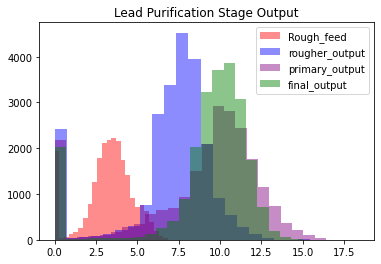

In [26]:
plt.hist(rougher_feed_pb, bins=25, alpha=0.45, color='red')
plt.hist(rougher_output_pb, bins=25, alpha=0.45, color='blue')
plt.hist(primary_output_pb, bins=25, alpha=0.45, color='purple')
plt.hist(final_output_pb, bins=25, alpha=0.45, color='green')

plt.title("Lead Purification Stage Output")
  
plt.legend(['Rough_feed', 'rougher_output',
            'primary_output', 'final_output'])
  
plt.show()

#### Histogram of silver changes throughout the stages

In the histogram below, we can visually see that the lead values are increasing steadily. We can also see that there are extreme values near the 0-2 region of the histogram. We can conclude that the lead amount is increasing throughout each process. 

#### The silver concentration increases as it goes through the first purification stage of floatation. 
#### Then the silver decreases in concentration over the next several stages until it has an average concentration that's half of what it started with.

In [27]:
print(f"The average value of silver in the gold ore mixture was {round(gold_full['rougher.input.feed_ag'].mean(), 2)}")
print(' ')
print(f"The average value of silver after the floatation process was {round(gold_full['rougher.output.concentrate_ag'].mean(), 2)}")
print(' ')
print(f"The average value of silver after the first stage of cleaner process was {round(gold_full['primary_cleaner.output.concentrate_ag'].mean(), 2)}")
print(' ')
print(f"The average value of silver after the second stage of cleaner that is the final concentrate of lead is {round(gold_full['final.output.concentrate_ag'].mean(), 2)}")

The average value of silver in the gold ore mixture was 8.07
 
The average value of silver after the floatation process was 10.87
 
The average value of silver after the first stage of cleaner process was 7.69
 
The average value of silver after the second stage of cleaner that is the final concentrate of lead is 4.78


In [28]:
rougher_feed_ag = gold_full['rougher.input.feed_ag']
rougher_output_ag = gold_full['rougher.output.concentrate_ag']
primary_output_ag = gold_full['primary_cleaner.output.concentrate_ag']
final_output_ag = gold_full['final.output.concentrate_ag']

In the histogram below, we can visually see that the silver values are increase through the first process and then decrease exponentially as we continue through the phases. We can also see that there are extreme values near the 0-2 region of the histogram. We can conclude that the silver amount is decreasing throughout each process. 

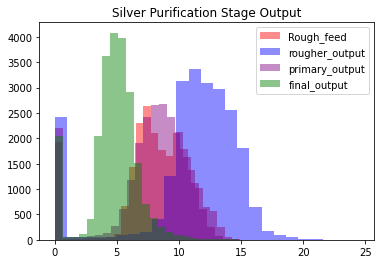

In [29]:
plt.hist(rougher_feed_ag, bins=25, alpha=0.45, color='red')
plt.hist(rougher_output_ag, bins=25, alpha=0.45, color='blue')
plt.hist(primary_output_ag, bins=25, alpha=0.45, color='purple')
plt.hist(final_output_ag, bins=25, alpha=0.45, color='green')

plt.title("Silver Purification Stage Output")
  
plt.legend(['Rough_feed', 'rougher_output',
            'primary_output', 'final_output'])
  
plt.show()

##  Inspecting the Gold Concentrate change over the different purification stages

#### The gold concentration continues to increase, exponentially, as it goes through the purification stages.

In [30]:
print(f"The average value of gold in the gold ore mixture was {round(gold_full['rougher.input.feed_au'].mean(), 2)}")
print(' ')
print(f"The average value of gold after the floatation process was {round(gold_full['rougher.output.concentrate_au'].mean(), 2)}")
print(' ')
print(f"The average value of gold after the first stage of cleaner process was {round(gold_full['primary_cleaner.output.concentrate_au'].mean(), 2)}")
print(' ')
print(f"The average value of gold after the second stage of cleaner that is the final concentrate of lead is {round(gold_full['final.output.concentrate_au'].mean(), 2)}")

The average value of gold in the gold ore mixture was 7.57
 
The average value of gold after the floatation process was 17.88
 
The average value of gold after the first stage of cleaner process was 29.21
 
The average value of gold after the second stage of cleaner that is the final concentrate of lead is 40.0


In the histogram below, we can visually see that the gold values are increasing exponentially. We can also see that there are extreme values near the 0-2 region of the histogram. We can conclude that the gold amount is increasing throughout each process. 

In [31]:
rougher_feed_au = gold_full['rougher.input.feed_au']
rougher_output_au = gold_full['rougher.output.concentrate_au']
primary_output_au = gold_full['primary_cleaner.output.concentrate_au']
final_output_au = gold_full['final.output.concentrate_au']

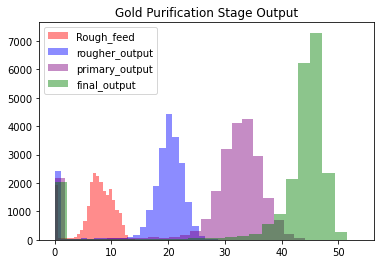

In [32]:
plt.hist(rougher_feed_au, bins=25, alpha=0.45, color='red')
plt.hist(rougher_output_au, bins=25, alpha=0.45, color='blue')
plt.hist(primary_output_au, bins=25, alpha=0.45, color='purple')
plt.hist(final_output_au, bins=25, alpha=0.45, color='green')

plt.title("Gold Purification Stage Output")
  
plt.legend(['Rough_feed', 'rougher_output',
            'primary_output', 'final_output'])
  
plt.show()

## Sum of all materials throughout the stages.

Interestingly, we can see that the total amount of materials is actually decreasing throughout each process. We do still have extremes at the 0-10 range of this material. Conclusively, we can see our materials are decreasing.

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Here we can note that while a 0 concentration of one metal is normal (maybe it's just not present in the sample of material), it is not possible for the sum of concentrations of all metals to be 0 (are we running the process on empty?).

</div>

<div class="alert alert-info">
  I agree it's very strange for there to be 0-5 outliers in the cases. Is there a way to get rid of these extremes without messing up the dataframes for the machine learning below?
</div>
  

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>

Sure, you can filter the dataframe to only include the rows where the sum of concentrations of all metals is greater than some small threshold

</div>

#### Output of all materials for the purification process at the different stages

In [33]:
rough_concentrate = gold_full['rougher.input.feed_ag'] + gold_full['rougher.input.feed_pb'] + gold_full['rougher.input.feed_au']
primary_cleaner = gold_full['primary_cleaner.output.concentrate_ag'] + gold_full['primary_cleaner.output.concentrate_pb'] + gold_full['primary_cleaner.output.concentrate_au']
final_output = gold_full['final.output.concentrate_ag'] + gold_full['primary_cleaner.output.concentrate_au'] + gold_full['primary_cleaner.output.concentrate_pb']

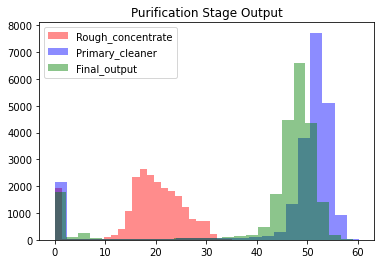

In [34]:
plt.hist(rough_concentrate, bins=25, alpha=0.45, color='red')
plt.hist(primary_cleaner, bins=25, alpha=0.45, color='blue')
plt.hist(final_output, bins=25, alpha=0.45, color='green')

plt.title("Purification Stage Output")
  
plt.legend(['Rough_concentrate', 
            'Primary_cleaner', 'Final_output'])
  
plt.show()

#### Showing the differences between the amount of feed size in the training set and the testing set.

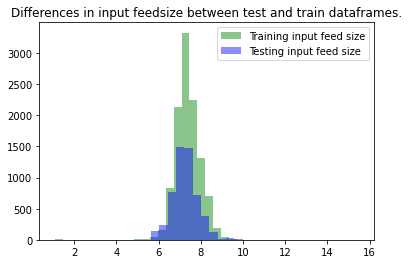

In [35]:
plt.hist(gold_train_df["primary_cleaner.input.feed_size"], bins=25, alpha=0.45, color='green')
plt.hist(gold_test_df['primary_cleaner.input.feed_size'], bins=25, alpha=0.45, color='blue')

plt.title("Differences in input feedsize between test and train dataframes.")
  
plt.legend(['Training input feed size', 
            'Testing input feed size'])
  
plt.show()

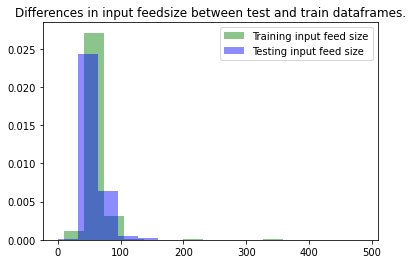

In [36]:


plt.hist(gold_train_df["rougher.input.feed_size"], bins=15, alpha=0.45, color='green', density=True)
plt.hist(gold_test_df['rougher.input.feed_size'], bins=15, alpha=0.45, color='blue', density=True)
plt.title("Differences in input feedsize between test and train dataframes.")
  
plt.legend(['Training input feed size', 
            'Testing input feed size'])
  
plt.show()


<div class="alert alert-warning">
<b>Reviewer's comment V3</b>

Looks good! One suggestion: when comparing distributions of samples of different size it's better to use densities (e.g. by setting `density=True` keyword of `plt.hist()`)

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Using mean values is simplifying things a bit too much, but alright. I would suggest using histograms instead (if we plot the distribution of a metal's concentration at different stages on one axis, it is convenient to compare them)

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Better now! It would be easier to compare different stages if you put them on the same plot though

</div>

<div class="alert alert-info">
 I moved all of the histograms to one graph for each of the different sections.
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Ok, great!

</div>

## Checking the input feed size of the training dataframe and the test dataframe to see if they are relatively close in value

#### The rougher input feed_size and the primary cleaner input feed size have very different distributions. 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. In this case it's definitely not enough to look at just the mean values. Samples with very different distributions can easily have the same mean values. Check out [this nice example](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
    
2. What about `rougher.input.feed_size`?

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

The above problems are still there

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Fixed above!

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

This task is missing:
    
> 2.3. Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

## sMAPE Function

In [37]:
def smape(target, predictions):
    return (np.abs(predictions - target) / ((np.abs(target) + np.abs(predictions))/2)).mean()

def smape_weighted(y_true, y_pred):
    rougher = smape(y_true['rougher.output.recovery'], y_pred[0])
    final = smape(y_true['final.output.recovery'], y_pred[1])
    return 0.25 * rougher + 0.75 * final

In [38]:
smape_score = make_scorer(smape_weighted)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

`smape` function is correct. For `smape_weighted` we need to note that `y_pred[0]` only returns the first column of `y_pred` if `y_pred` is a pandas.DataFrame where the first column has name 0. Usually column names are strings, and `y_pred[0]` would return the first row. So it's easy to make a mistake here.

</div>

## Final Score

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

def score_model(model, cv=5):
    scores = []
    for subtrain_index, valid_index in KFold(n_splits=cv).split(X_train):
        X_subtrain = X_train.loc[subtrain_index].reset_index(drop=True)
        y_subtrain = y_train.loc[subtrain_index].reset_index(drop=True)
        X_valid = X_train.loc[valid_index].reset_index(drop=True)
        y_valid = y_train.loc[valid_index].reset_index(drop=True)
        
        model.fit(X_subtrain, y_subtrain)
        pred_valid = pd.DataFrame(model.predict(X_valid))
        
        scores.append(smape_weighted(y_valid, pred_valid))
        
    return pd.Series(scores).mean()

<div class="alert alert-success">
<b>Reviewer's comment</b>

The function for cross-validation is correct

</div>

## Linear Regression, Decision Trees, Random Forest Regressor, and K-Nearest Neighbors

<div class="alert alert-warning">
<s><b>Reviewer's comment</b>

It's better to do all imports at the top of the notebook. That way, you're gonna find out right away if you're missing some library, and won't have to redo potentially long computations.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!
    
</div>

## Created the features value

In [40]:
test_columns = gold_test_df.columns

In [41]:
features_train = gold_train_df[test_columns]

In [42]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               11017 non-null  float64
 1   primary_cleaner.input.depressant            11017 non-null  float64
 2   primary_cleaner.input.feed_size             11017 non-null  float64
 3   primary_cleaner.input.xanthate              11017 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      11017 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    11017 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      11017 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    11017 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      11017 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    1101

In [43]:
type(features_train)

pandas.core.frame.DataFrame

In [44]:
features_train.shape

(11017, 52)

In [45]:
features_test = gold_test_df

In [46]:
features_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Not all columns can be used as features in our models: all output and calculation columns are obtained only later in the process, and as we need the predictions at the start of the process, we won't be able to get their values in real life.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

## Created the target value

In [47]:
target_train = gold_train_df[['rougher.output.recovery', 'final.output.recovery']].reset_index(drop=True)
target_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  11017 non-null  float64
 1   final.output.recovery    11017 non-null  float64
dtypes: float64(2)
memory usage: 172.3 KB


In [48]:
#target_test = gold_full[['rougher.output.recovery', 'final.output.recovery']].loc[gold_test_df.index].reset_index(drop=True).fillna(method='ffill')
target_test = gold_full[['rougher.output.recovery', 'final.output.recovery']].loc[gold_test_df.index].reset_index(drop=True).dropna()
target_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 5382
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  5229 non-null   float64
 1   final.output.recovery    5229 non-null   float64
dtypes: float64(2)
memory usage: 122.6 KB


<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Great, you successfully obtained test set targets from the full dataset.
   
It's not appropriate to fill missing values in target variables though, especially in the test set: we won't be able to trust model evaluation scores on this data

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Missing values were dropped

</div>

In [49]:
target_test.isna().sum()

rougher.output.recovery    0
final.output.recovery      0
dtype: int64

In [50]:
type(target_train)

pandas.core.frame.DataFrame

In [51]:
target_train.shape

(11017, 2)

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

In some cases customer has a precollected test set, on which they want the final model to be evaluated. This is the case in this project. You can use the full dataset to recover targets for the test set.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

#### Resetting and dropping previous index

In [52]:
X_train = features_train.reset_index(drop=True)

In [53]:
X_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
11013,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
11014,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
11015,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


#### Resetting and dropping previous index

In [54]:
y_train = target_train

In [55]:
y_train

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
11012,89.574376,73.755150
11013,87.724007,69.049291
11014,88.890579,67.002189
11015,89.858126,65.523246


# Modeling the features and target to get best result

In [56]:
models = ['LinearRegression', 'DecisionTreeRegressor', 'KNeighborsRegressor', 'RandomForestRegressor']
cross_val_score = []

## Linear Regression Model

In [57]:
linear_model = LinearRegression()

#### Fitting Model

In [58]:
linear_model.fit(X_train, y_train)

LinearRegression()

#### Creating a prediction for the model

In [59]:
linear_model_pred = linear_model.predict(features_test)

In [60]:
linear_model_pred

array([[88.66660227, 71.39656795],
       [91.93015631, 72.18228757],
       [91.62997064, 71.99311947],
       ...,
       [89.52643375, 72.25768574],
       [90.32906233, 74.28076377],
       [89.94582905, 73.50673249]])

#### Cross-Validation Score

In [61]:
linear_regression_cross_val_score = score_model(linear_model)
cross_val_score.append(linear_regression_cross_val_score)

In [62]:
smape(target_test, linear_model_pred[:len(target_test)])

rougher.output.recovery    0.111949
final.output.recovery      0.095032
dtype: float64

## Decision Tree Regressor Model

In [63]:
tree_model = DecisionTreeRegressor(random_state=12345)

#### Fitting Model

In [64]:
tree_model.fit(X_train, target_train)

DecisionTreeRegressor(random_state=12345)

#### Creating a prediction for the model

In [65]:
tree_model_pred = tree_model.predict(features_test)

#### Cross-Validation score

In [66]:
decisiontree_cross_val_score = score_model(tree_model)


In [67]:
pd.DataFrame(tree_model_pred, columns=['rougher.output.recovery', 'final.output.recovery'])

,rougher.output.recovery,final.output.recovery
0,88.805113,66.122525
1,88.805113,66.122525
2,87.038292,68.792493
3,87.038292,68.792493
4,90.137055,75.165539
...,...,...
5378,91.416699,73.878055
5379,90.419452,78.128741
5380,92.184357,72.580062
5381,91.474959,69.728682


In [68]:
target_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5378,95.172585,68.919891
5379,94.575036,68.440582
5380,93.018138,67.092759
5381,92.599042,68.061186


In [69]:
cross_val_score.append(decisiontree_cross_val_score)

In [70]:
smape(target_test, tree_model_pred[:len(target_test)])

rougher.output.recovery    0.133496
final.output.recovery      0.127398
dtype: float64

## KNeighbors Regressor Model

In [71]:
knn_model = KNeighborsRegressor()

#### Fitting Model

In [72]:
knn_model.fit(X_train, target_train)

KNeighborsRegressor()

#### Creating a prediction for the model

In [73]:
knn_model_pred = knn_model.predict(features_test)


#### Cross-Validation Score

In [74]:
knn_cross_val_score = score_model(knn_model)
cross_val_score.append(knn_cross_val_score)

In [75]:
smape(target_test, knn_model_pred[:len(target_test)])

rougher.output.recovery    0.111476
final.output.recovery      0.129373
dtype: float64

## Random Forest Regressor Model

In [76]:
rf_model = RandomForestRegressor(random_state=12345)

#### Fitting Model

In [77]:
rf_model.fit(X_train, target_train)

RandomForestRegressor(random_state=12345)

#### Creating a prediction for the model

In [78]:
rf_model_pred = rf_model.predict(features_test)

#### Cross-Validation Score

In [79]:
rf_cross_val_score = score_model(rf_model)
cross_val_score.append(rf_cross_val_score)

In [80]:
smape(target_test, rf_model_pred[:len(target_test)])

rougher.output.recovery    0.127111
final.output.recovery      0.101329
dtype: float64

## Looking at the models and the cross validation scores

In [81]:
for cvs, model in zip(cross_val_score, models):
    print(f"{model}: {cvs}")

LinearRegression: 0.10290896728293322
DecisionTreeRegressor: 0.177211689525644
KNeighborsRegressor: 0.13402893901861673
RandomForestRegressor: 0.11398599864878038


## Conclusion: The Linear Regression model has the lowest sMAPE score with a value of around 0.103. 

We can see that our model performs better than our dummy regression model and will output more gold at the

In [82]:
linear_model_pred

array([[88.66660227, 71.39656795],
       [91.93015631, 72.18228757],
       [91.62997064, 71.99311947],
       ...,
       [89.52643375, 72.25768574],
       [90.32906233, 74.28076377],
       [89.94582905, 73.50673249]])

In [83]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(X_train, target_train)
DummyRegressor()
dummy_regr_predict = dummy_regr.predict(features_test)
dummy_regr_predict

array([[84.84775402, 67.31974226],
       [84.84775402, 67.31974226],
       [84.84775402, 67.31974226],
       ...,
       [84.84775402, 67.31974226],
       [84.84775402, 67.31974226],
       [84.84775402, 67.31974226]])

In [84]:
target_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5378,95.172585,68.919891
5379,94.575036,68.440582
5380,93.018138,67.092759
5381,92.599042,68.061186


Printing out the smape final score of the linear model and the dummy regressor to evaluate differences.

In [85]:
linear_model_pred_df = pd.DataFrame(linear_model_pred, columns=[0, 1])

In [86]:
linear_smape_final = smape_weighted(target_test, linear_model_pred_df)
linear_smape_final

0.09149767611435873

In [87]:
dummy_r_pred_df = pd.DataFrame(dummy_regr_predict, columns=[0, 1])


dummy_smape_final = smape_weighted(target_test, dummy_r_pred_df)
dummy_smape_final

0.09153868026837095

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

It's great that you tried a few different models, but there are some problems:
    
1. We were predicting the amount of oil reserves in the previous project, in this project there is no `volume of predicted reserves` to speak of :)
    
2. In this project our target metric is SMAPE, not MSE.
    
3. SMAPE is symmetric mean average percentage *error*, so lower values are better.
    
4. The test set should not be used to compare different models. Its only purpose is to get an unbiased estimate of how well the final model generalizes to new data which was not used for training/hyperparameter tuning/model selection. If we use the test set to compare the models, that assumption is broken, and the test set score of the final model will be overly optimistic. To avoid it we can use cross-validation on the train set to compare different models, select the best one, and only evaluate that one model on the test set.

5. Please add some hyperparameter tuning (using cross-validation) for at least one model.
    
6. Also please add a comparison with a simple baseline, for example a constant model always predicting mean or median of train set targets (it's convenient to use [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))
    
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Alright, two more things:
    
1. While you made predictions for the test set, you didn't really calculate the SMAPE of your final model on the test set.
    
2. Please add a comparison with a simple baseline, for example a constant model always predicting mean or median of train set targets (it's convenient to use  [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html))

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

Ok, one last thing, I promise :)
    
Could you please calculate weighted SMAPE for the dummy model and your final model? Otherwise it's unclear how to compare their results.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Great!

</div>